In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import csv

In [4]:
#df = pd.read_excel(r'Sorghum BAP panel accesions.xlsx', sheet_name='BAP code_ware_lab')
dfSize = pd.read_csv('ExtractedSizeValues-BAP.csv')
dfColor = pd.read_csv('ExtractedColorValues-BAP.csv')
dfPanel = pd.read_csv('Sorghum BAP panel accesions.csv')

In [66]:
#drops 'Unnamed: 0'
dfSize = dfSize.drop('Unnamed: 0', axis = 1)
dfColor = dfColor.drop('Unnamed: 0', axis= 1)

In [67]:
#reorders the columns
dfSize = dfSize[['sample', 'totalCount', 'averageArea', 'majorAxisLength', 'minorAxisLength', 'stdMajorAxisLength', 'stdMinorAxisLength']]
dfColor = dfColor[['sample', 'closest color', 'r', 'g', 'b']]

In [6]:
dfSize.head(156)

,sample,totalCount,averageArea,majorAxisLength,minorAxisLength,stdMajorAxisLength,stdMinorAxisLength
0,BAP001,77,1089.276316,42.950050,32.822506,3.573650,2.379064
1,BAP001,79,1089.493506,42.962401,32.830360,3.524372,2.312145
2,BAP002,77,1148.283784,41.337140,35.884229,2.316698,2.889351
3,BAP002,76,1151.418919,41.385561,35.920347,2.332064,2.902864
4,BAP003,77,1198.220779,46.719411,33.129129,3.756608,2.592952
...,...,...,...,...,...,...,...
151,BAP100,40,2072.583333,55.239794,48.259729,3.525203,3.791067
152,BAP100,40,2089.685714,54.984701,48.815179,3.549707,3.152036
153,BAP101,50,1412.148936,45.733211,39.612471,2.869412,2.755454
154,BAP101,49,1423.617021,45.884896,39.773388,2.938393,2.939930


In [7]:
dfColor

,sample,closest color,r,g,b
0,BAP001,dark brown,133.109841,83.827450,70.820093
1,BAP001,red,133.638343,84.340199,71.622830
2,BAP002,dark brown,137.587581,78.575858,63.524604
3,BAP002,dark brown,137.212575,77.922646,62.654411
4,BAP003,dark brown,130.375937,73.384310,61.998311
...,...,...,...,...,...
684,BAP386,red,147.988261,93.659243,78.593205
685,BAP386,red,142.432637,88.646470,74.545303
686,BTX623,chalky white,179.789541,150.733319,136.011400
687,BTX623,chalky white,179.843267,150.719958,136.126101


In [8]:
dfPanel

,Field Code (Riverhead/Uplands),Taxa,PHOTOPERIOD,Type,Origin,Race,Riverhead # Panicles 2019
0,BAP001,PI 144134,PHOTOPERIOD_INSENSITIVE,Sweet,NaN,NaN,NaN
1,BAP002,PI 145619,PHOTOPERIOD_INSENSITIVE,Sweet,South Africa,Caudatum,NaN
2,BAP003,PI 145626,PHOTOPERIOD_INSENSITIVE,Sweet,South Africa,Kafir-bicolor,NaN
3,BAP004,PI 145632,PHOTOPERIOD_INSENSITIVE,Sweet,South Africa,NaN,NaN
4,BAP005,PI 145633,PHOTOPERIOD_INSENSITIVE,Cellulosic,South Africa,NaN,NaN
...,...,...,...,...,...,...,...
385,BAP386,PI 92270,PHOTOPERIOD_INSENSITIVE,Sweet,China,Mixed,NaN
386,BAP387,ATLAS,PHOTOPERIOD_INSENSITIVE,Sweet,NaN,NaN,NaN
387,BAP388,LEOTI,PHOTOPERIOD_INSENSITIVE,Sweet,NaN,NaN,NaN
388,BAP389,RIO,PHOTOPERIOD_INSENSITIVE,Sweet,NaN,NaN,NaN


In [9]:
dfSize['sample'].nunique()

357

In [10]:
dfColor['sample'].nunique()

357

In [11]:
#I merged add three data frames
dfMerge = pd.merge(dfSize, dfColor, left_index = True, right_index = True)
dfMaster = dfMerge.merge(dfPanel, how = 'left', left_on = 'sample_x', right_on = 'Field Code (Riverhead/Uplands)', sort = True)
dfMaster = dfMaster.drop('sample_y', axis = 1).rename(columns={'sample_x':'sample'})
dfMaster

,sample,totalCount,averageArea,majorAxisLength,minorAxisLength,stdMajorAxisLength,stdMinorAxisLength,closest color,r,g,b,Field Code (Riverhead/Uplands),Taxa,PHOTOPERIOD,Type,Origin,Race,Riverhead # Panicles 2019
0,BAP001,77,1089.276316,42.950050,32.822506,3.573650,2.379064,dark brown,133.109841,83.827450,70.820093,BAP001,PI 144134,PHOTOPERIOD_INSENSITIVE,Sweet,NaN,NaN,NaN
1,BAP001,79,1089.493506,42.962401,32.830360,3.524372,2.312145,red,133.638343,84.340199,71.622830,BAP001,PI 144134,PHOTOPERIOD_INSENSITIVE,Sweet,NaN,NaN,NaN
2,BAP002,77,1148.283784,41.337140,35.884229,2.316698,2.889351,dark brown,137.587581,78.575858,63.524604,BAP002,PI 145619,PHOTOPERIOD_INSENSITIVE,Sweet,South Africa,Caudatum,NaN
3,BAP002,76,1151.418919,41.385561,35.920347,2.332064,2.902864,dark brown,137.212575,77.922646,62.654411,BAP002,PI 145619,PHOTOPERIOD_INSENSITIVE,Sweet,South Africa,Caudatum,NaN
4,BAP003,77,1198.220779,46.719411,33.129129,3.756608,2.592952,dark brown,130.375937,73.384310,61.998311,BAP003,PI 145626,PHOTOPERIOD_INSENSITIVE,Sweet,South Africa,Kafir-bicolor,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,BAP386,29,1748.148148,60.770226,37.174007,3.817297,3.111146,red,147.988261,93.659243,78.593205,BAP386,PI 92270,PHOTOPERIOD_INSENSITIVE,Sweet,China,Mixed,NaN
685,BAP386,27,1755.615385,60.678087,37.252298,4.035801,2.928116,red,142.432637,88.646470,74.545303,BAP386,PI 92270,PHOTOPERIOD_INSENSITIVE,Sweet,China,Mixed,NaN
686,BTX623,55,1612.400000,47.777503,43.470039,2.891303,2.722905,chalky white,179.789541,150.733319,136.011400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687,BTX623,55,1615.431818,47.846348,43.484828,2.854510,2.750525,chalky white,179.843267,150.719958,136.126101,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#ignore
"""dfMerge1 = pd.merge(dfSize, dfColor, on=['sample'])
dfMerge1"""

"dfMerge1 = pd.merge(dfSize, dfColor, on=['sample'])\ndfMerge1"

In [13]:
#ignore
"""dfMerged2 = dfSize.merge(dfColor, how = 'left', left_on = 'sample', right_on = 'sample', sort = True).iloc[::2]
dfMaster = dfMerged2.merge(dfPanel, how = 'left', left_on = 'sample', right_on = 'Field Code (Riverhead/Uplands)', sort = True)
dfMaster"""

"dfMerged2 = dfSize.merge(dfColor, how = 'left', left_on = 'sample', right_on = 'sample', sort = True).iloc[::2]\ndfMaster = dfMerged2.merge(dfPanel, how = 'left', left_on = 'sample', right_on = 'Field Code (Riverhead/Uplands)', sort = True)\ndfMaster"

In [14]:
#SINGLE and MULTIPLE images that were scanned
import collections
sample = []

for sampleName in dfSize['sample']:
    sample.append(sampleName)
    
singleImages = [sample for sample, count in collections.Counter(sample).items() if count == 1]
singleImages = dfSize[dfSize['sample'].isin(singleImages)]

multipleImages = [sample for sample, count in collections.Counter(sample).items() if count > 2]
multipleImages = dfSize[dfSize['sample'].isin(multipleImages)]

In [53]:
#this does the same thing as 'singleImages', just in a diffrent way
dfSize[~dfSize.duplicated('sample', keep = False)]

,sample,totalCount,averageArea,majorAxisLength,minorAxisLength,stdMajorAxisLength,stdMinorAxisLength
42,BAP022,39,1891.416667,52.437507,46.972693,2.267978,2.556175
173,BAP111,23,1846.363636,55.307527,44.289565,6.326366,4.547666
198,BAP124,13,1678.571429,54.390341,39.562515,4.097089,4.076039
199,BAP125,13,249.750000,50.482857,27.124693,12.841180,2.337436
210,BAP131,22,1461.200000,102.159389,44.510784,30.529379,4.949934
239,BAP146,13,928.555556,51.957263,33.576238,15.459711,5.432719
240,BAP147,52,349.020408,40.549215,22.126923,8.217983,3.923136
241,BAP148,20,1244.500000,48.703070,36.136964,10.288542,2.861307
274,BAP165,14,813.000000,126.793711,44.122741,0.000000,0.000000
303,BAP181,9,1809.333333,60.099966,44.099353,3.786449,1.461019


In [52]:
#samples with only one image
"""BAP022
 BAP111
 BAP124
 BAP125
 BAP131
 BAP146
 BAP147
 BAP148
 BAP165
 BAP181
 BAP201
 BAP235
 BAP266
 BAP285
 BAP304
 BAP342
 BAP345
 BAP357
 BAP358
 BAP361
 BAP362
 BAP365
 BAP368
 BAP369
 BAP371
 BAP377
 BAP381"""

singleImages

,sample,totalCount,averageArea,majorAxisLength,minorAxisLength,stdMajorAxisLength,stdMinorAxisLength
42,BAP022,39,1891.416667,52.437507,46.972693,2.267978,2.556175
173,BAP111,23,1846.363636,55.307527,44.289565,6.326366,4.547666
198,BAP124,13,1678.571429,54.390341,39.562515,4.097089,4.076039
199,BAP125,13,249.750000,50.482857,27.124693,12.841180,2.337436
210,BAP131,22,1461.200000,102.159389,44.510784,30.529379,4.949934
239,BAP146,13,928.555556,51.957263,33.576238,15.459711,5.432719
240,BAP147,52,349.020408,40.549215,22.126923,8.217983,3.923136
241,BAP148,20,1244.500000,48.703070,36.136964,10.288542,2.861307
274,BAP165,14,813.000000,126.793711,44.122741,0.000000,0.000000
303,BAP181,9,1809.333333,60.099966,44.099353,3.786449,1.461019


In [39]:
#samples with more than 2 images
"""BAP240, BAP263"""
multipleImages

,sample,totalCount,averageArea,majorAxisLength,minorAxisLength,stdMajorAxisLength,stdMinorAxisLength
410,BAP240,17,2501.733333,62.042122,51.997730,3.492660,2.817972
411,BAP240,20,2634.500000,63.564565,53.183169,3.953770,3.618246
412,BAP240,20,2613.750000,63.936144,52.385160,3.200035,3.578345
686,BTX623,55,1612.400000,47.777503,43.470039,2.891303,2.722905
687,BTX623,55,1615.431818,47.846348,43.484828,2.854510,2.750525
688,BTX623,49,1623.268293,48.316361,43.222290,2.538787,2.956555


In [18]:
#Ignore this
"""for sample in dfSize['sample']:
    for num in range(0,10):
        x = ['BAP00' + str(num)]
        if dfSize['sample'].isin(x) is True:
            print(x)"""

"for sample in dfSize['sample']:\n    for num in range(0,10):\n        x = ['BAP00' + str(num)]\n        if dfSize['sample'].isin(x) is True:\n            print(x)"

In [19]:
#samples with MISSING images
"""49	BAP050
50	BAP051
51	BAP052
52	BAP053
53	BAP054
54	BAP055
55	BAP056
56	BAP057
57	BAP058
58	BAP059
59	BAP060
60	BAP061
61	BAP062
62	BAP063
63	BAP064
64	BAP065
65	BAP066
66	BAP067
67	BAP068
68	BAP069
69	BAP070
95	BAP096
96	BAP097
172	BAP173
182	BAP183
184	BAP185
208	BAP209
210	BAP211
301	BAP302
342	BAP343"""

#pd.set_option('display.max_rows', None)

allPossible = []
for num in range(1,10):
    allPossible.append('BAP00' + str(num))
for num in range(10,100):
    allPossible.append('BAP0' + str(num))
for num in range(100,387):
    allPossible.append('BAP' + str(num))
    
df_allPossible = pd.DataFrame(allPossible, columns = ['allPossible'])
sample = dfSize['sample'].tolist()

missing = df_allPossible[df_allPossible.isin(sample) == False].dropna()
print(missing['allPossible'].to_string(index = False))

 BAP050
 BAP051
 BAP052
 BAP053
 BAP054
 BAP055
 BAP056
 BAP057
 BAP058
 BAP059
 BAP060
 BAP061
 BAP062
 BAP063
 BAP064
 BAP065
 BAP066
 BAP067
 BAP068
 BAP069
 BAP070
 BAP096
 BAP097
 BAP173
 BAP183
 BAP185
 BAP209
 BAP211
 BAP302
 BAP343


In [62]:
#Seeds that had totalCount less than 10 or more than 30
tooLittle = dfSize[dfSize['totalCount'] < 5]
tooLittle
tooMuch = dfSize[dfSize['totalCount'] > 30]
odd_totalCount = pd.concat([tooLittle,tooMuch])
odd_totalCount
#print(odd_totalCount['sample'].to_string(index = False))

,sample,totalCount,averageArea,majorAxisLength,minorAxisLength,stdMajorAxisLength,stdMinorAxisLength
500,BAP285,2,1262.000000,44.987104,36.345330,0.000000,0.000000
612,BAP344,2,2009.000000,73.593302,48.048986,0.000000,0.000000
0,BAP001,77,1089.276316,42.950050,32.822506,3.573650,2.379064
1,BAP001,79,1089.493506,42.962401,32.830360,3.524372,2.312145
2,BAP002,77,1148.283784,41.337140,35.884229,2.316698,2.889351
...,...,...,...,...,...,...,...
546,BAP310,33,241.458333,38.472970,17.701466,7.594584,3.042602
559,BAP316,35,200.600000,31.825613,16.840151,8.758797,3.112235
686,BTX623,55,1612.400000,47.777503,43.470039,2.891303,2.722905
687,BTX623,55,1615.431818,47.846348,43.484828,2.854510,2.750525


In [21]:
#finds all of the seeds with a standard deviation of zero
"""45     BAP024
192    BAP121
236    BAP144
274    BAP165
338    BAP201
363    BAP216
500    BAP285
519    BAP295
528    BAP299
563    BAP318
578    BAP326
612    BAP344
45     BAP024
192    BAP121
236    BAP144
274    BAP165
338    BAP201
363    BAP216
500    BAP285
519    BAP295
528    BAP299
563    BAP318
578    BAP326
612    BAP344"""

stdMajorZero = dfSize[dfSize['stdMajorAxisLength'] == 0]
stdMinorZero = dfSize[dfSize['stdMinorAxisLength'] == 0]
stdZero = pd.concat([stdMajorZero,stdMinorZero])
print(stdZero['sample'].to_string(index = False))

 BAP024
 BAP121
 BAP144
 BAP165
 BAP201
 BAP216
 BAP285
 BAP295
 BAP299
 BAP318
 BAP326
 BAP344
 BAP024
 BAP121
 BAP144
 BAP165
 BAP201
 BAP216
 BAP285
 BAP295
 BAP299
 BAP318
 BAP326
 BAP344


In [22]:
# detect seeds with averageArea under 750 to detect poor detection
print(dfSize[dfSize['averageArea'] < 750]['sample'].to_string(index = False))

 BAP071
 BAP071
 BAP095
 BAP095
 BAP109
 BAP109
 BAP117
 BAP118
 BAP121
 BAP125
 BAP135
 BAP135
 BAP136
 BAP139
 BAP140
 BAP142
 BAP143
 BAP145
 BAP145
 BAP147
 BAP154
 BAP155
 BAP163
 BAP171
 BAP174
 BAP184
 BAP186
 BAP210
 BAP213
 BAP214
 BAP216
 BAP216
 BAP221
 BAP221
 BAP222
 BAP224
 BAP225
 BAP225
 BAP228
 BAP228
 BAP229
 BAP229
 BAP249
 BAP251
 BAP262
 BAP267
 BAP267
 BAP270
 BAP272
 BAP287
 BAP297
 BAP299
 BAP309
 BAP309
 BAP310
 BAP316
 BAP318
 BAP318
 BAP335
 BAP347
 BAP348
 BAP350
 BAP350
 BAP351
 BAP351
 BAP352
 BAP352
 BAP354
 BAP354
 BAP356
 BAP357
 BAP358
 BAP361
 BAP363
 BAP363
 BAP365
 BAP366
 BAP370
 BAP373
 BAP373
 BAP375
 BAP375
 BAP376
 BAP376
 BAP377


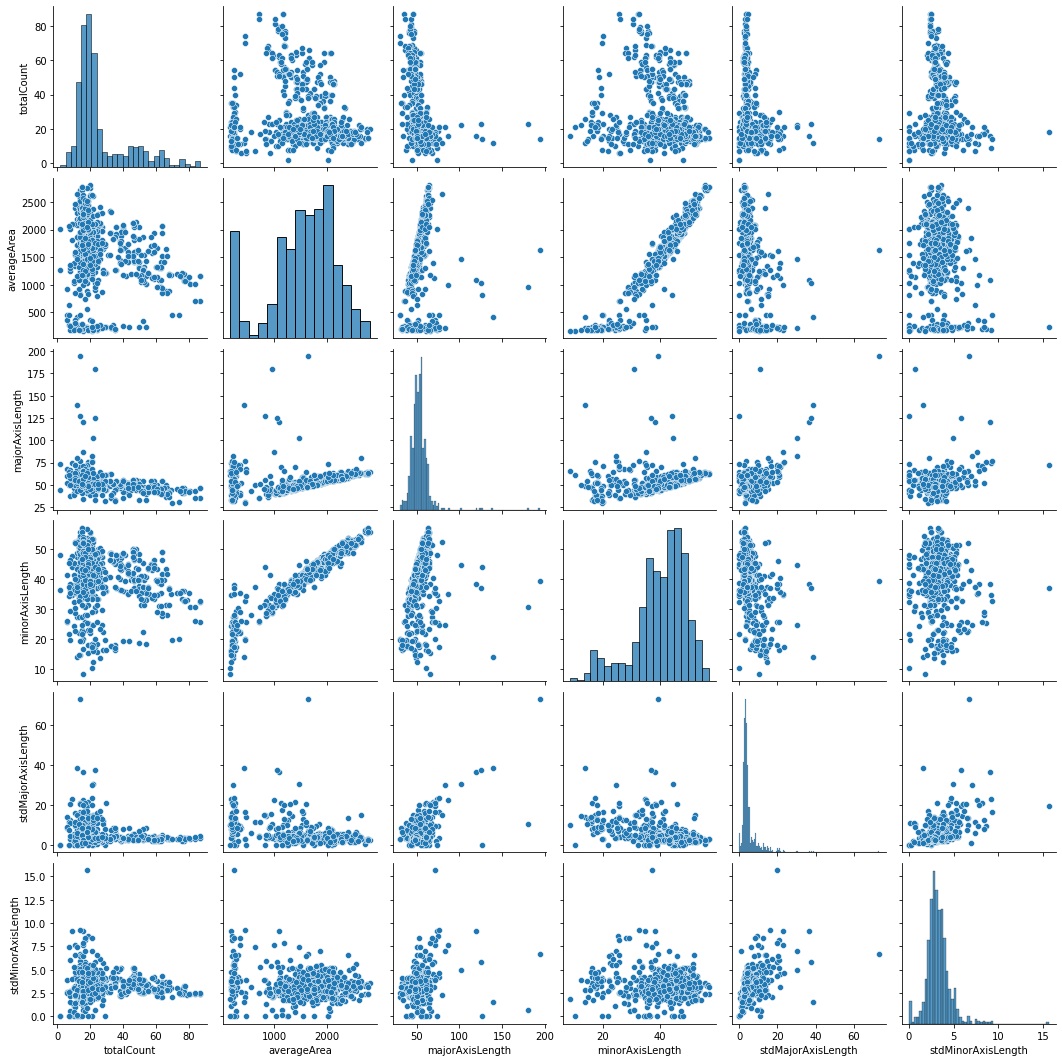

In [23]:
sns.pairplot(dfSize)

C:\Users\peng_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'stdMajorAxisLength')

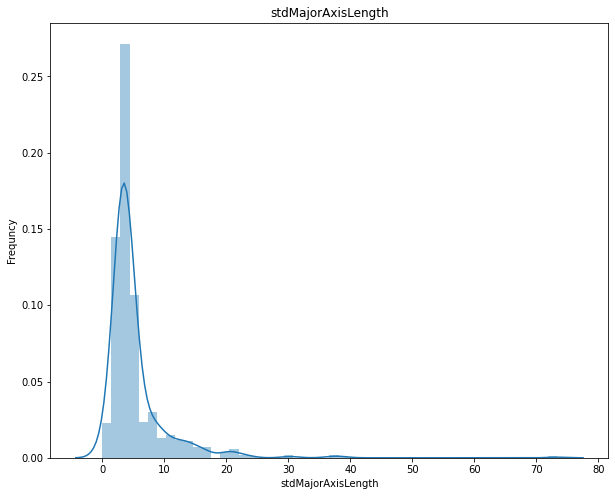

In [24]:
ax = plt.figure(figsize = [10,8])
ax = sns.distplot(a = dfSize['stdMajorAxisLength'], kde = True)
plt.title('stdMajorAxisLength')
plt.ylabel('Frequncy')
plt.xlabel('stdMajorAxisLength')

C:\Users\peng_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'stdMinorAxisLength')

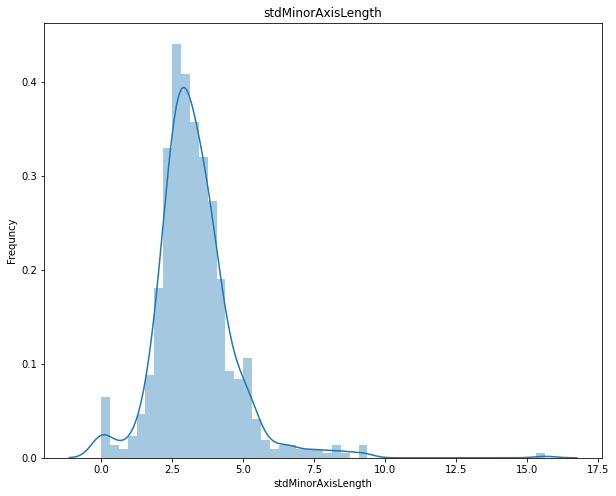

In [25]:
ax = plt.figure(figsize = [10,8])
ax = sns.distplot(a = dfSize['stdMinorAxisLength'], kde = True)
plt.title('stdMinorAxisLength')
plt.ylabel('Frequncy')
plt.xlabel('stdMinorAxisLength')

C:\Users\peng_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'stdMajorAxisLength')

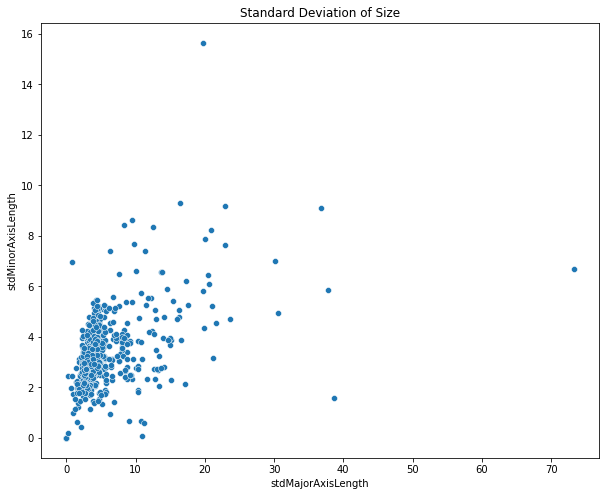

In [26]:
ax = plt.figure(figsize = [10,8])
ax = sns.scatterplot(dfSize['stdMajorAxisLength'], dfSize['stdMinorAxisLength'])
plt.title('Standard Deviation of Size')
plt.ylabel('stdMinorAxisLength')
plt.xlabel('stdMajorAxisLength')

C:\Users\peng_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\peng_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\peng_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


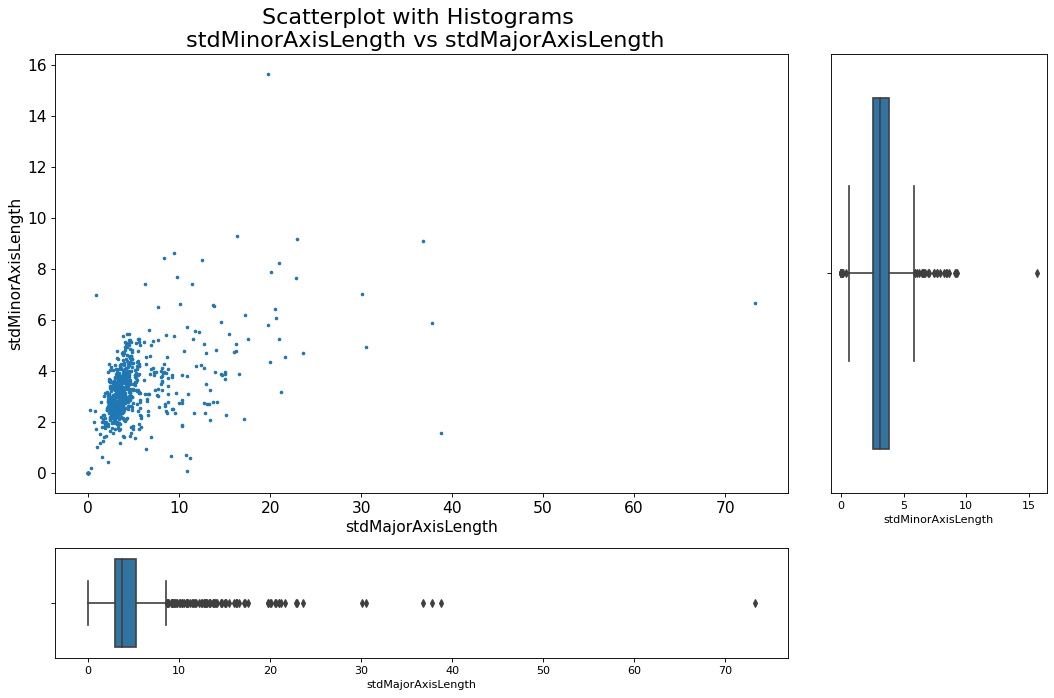

In [27]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1])
ax_bottom = fig.add_subplot(grid[-1, 0:-1])

# Scatterplot on main ax
ax_main.scatter(dfSize['stdMajorAxisLength'], dfSize['stdMinorAxisLength'], s=5)

# Add a graph in each part
sns.boxplot(dfSize['stdMinorAxisLength'], ax=ax_right, orient="v")
sns.boxplot(dfSize['stdMajorAxisLength'], ax=ax_bottom, orient="h")

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n stdMinorAxisLength vs stdMajorAxisLength', xlabel='stdMajorAxisLength', ylabel='stdMinorAxisLength')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

C:\Users\peng_\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

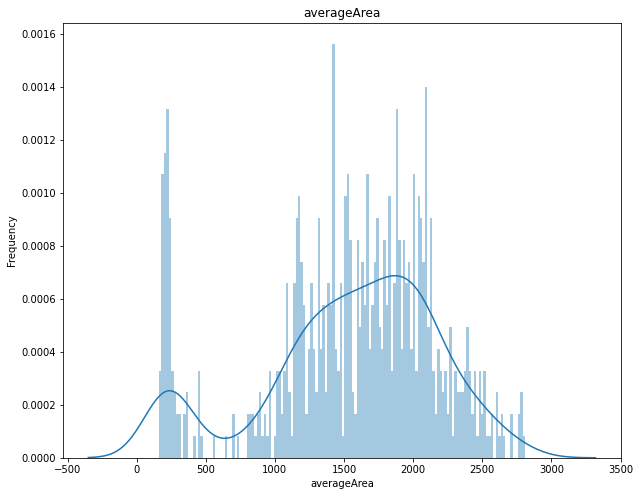

In [68]:
#distplot AVERAGE AREA
ax = plt.figure(figsize = [10, 8])
data = dfSize['averageArea']
ax = sns.distplot(a = data, kde = True, bins = 150)
plt.title('averageArea')
plt.ylabel('Frequency')

# I want to create a function that checks for abnormalities between seeds of the same sample and the average area. For example, I want to return all the seeds that are 100pixles off from the second scan. Any ideas on how I would do this?

Text(0.5, 0, 'majorAxisLength')

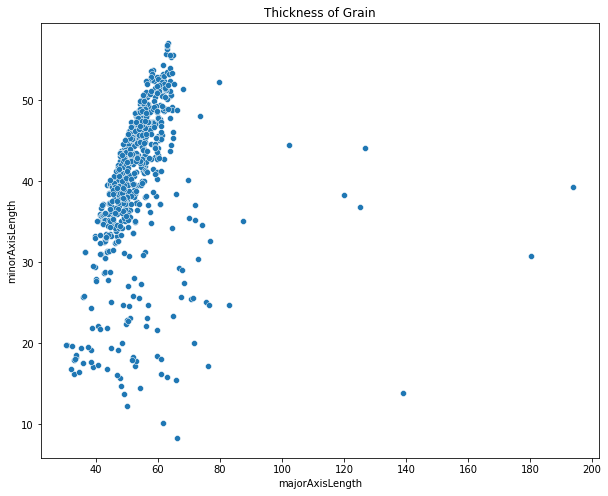

In [69]:
ax = plt.figure(figsize = [10, 8])
sns.scatterplot(x = dfSize['majorAxisLength'], y = dfSize['minorAxisLength'])
plt.title('Thickness of Grain')
plt.ylabel('minorAxisLength')
plt.xlabel('majorAxisLength')

In [30]:
#I am not sure how to determine if something is statistically significant based off of a scatterplot.
#So I chose to use 80 as my statistically significant value
dfSize[dfSize['majorAxisLength'] >= 80]

,sample,totalCount,averageArea,majorAxisLength,minorAxisLength,stdMajorAxisLength,stdMinorAxisLength
200,BAP126,16,1093.800000,120.154410,38.270095,36.751939,9.100911
201,BAP126,16,997.250000,87.296924,35.066658,22.869239,7.625109
207,BAP129,23,1040.600000,125.277533,36.850316,37.761626,5.866360
210,BAP131,22,1461.200000,102.159389,44.510784,30.529379,4.949934
223,BAP138,23,960.000000,180.420857,30.787779,10.774152,0.689337
231,BAP142,12,424.666667,139.134062,13.815325,38.723132,1.581695
235,BAP144,14,1634.500000,194.054003,39.275837,73.257879,6.674386
237,BAP145,21,212.444444,82.813527,24.689699,30.080293,7.023360
274,BAP165,14,813.000000,126.793711,44.122741,0.000000,0.000000


# Color

<AxesSubplot:>

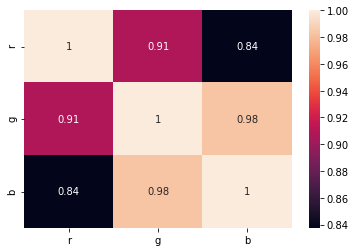

In [31]:
corelation = dfColor.corr()
sns.heatmap(corelation, annot = True)

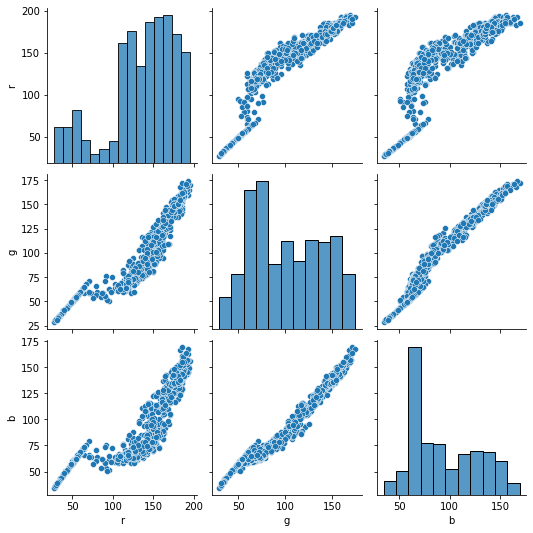

In [32]:
sns.pairplot(dfColor)

# BAP Panel Accensions

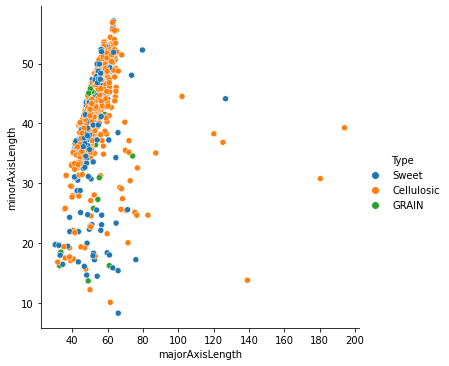

In [33]:
sns.relplot(x = 'majorAxisLength', y = 'minorAxisLength', hue = 'Type', data = dfMaster)

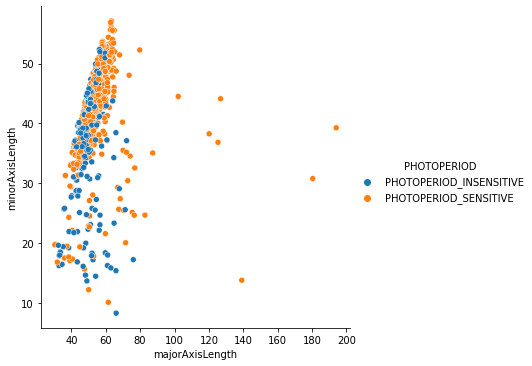

In [34]:
sns.relplot(x = 'majorAxisLength', y = 'minorAxisLength', hue = 'PHOTOPERIOD', data = dfMaster)

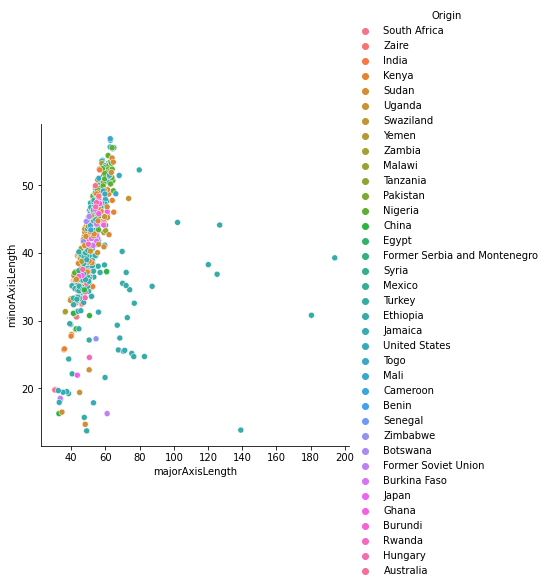

In [35]:
#lol 50 shades of the rainbow
sns.relplot(x = 'majorAxisLength', y = 'minorAxisLength', hue = 'Origin', data = dfMaster)

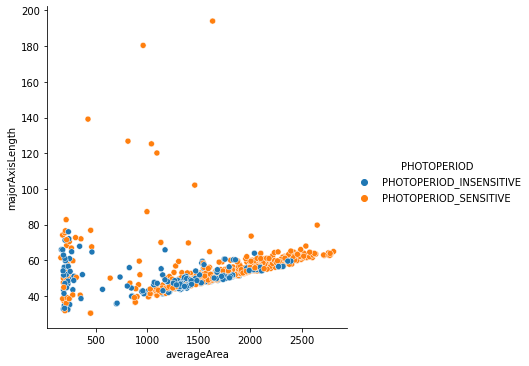

In [36]:
sns.relplot(x = 'averageArea', y = 'majorAxisLength', hue = 'PHOTOPERIOD', data = dfMaster)

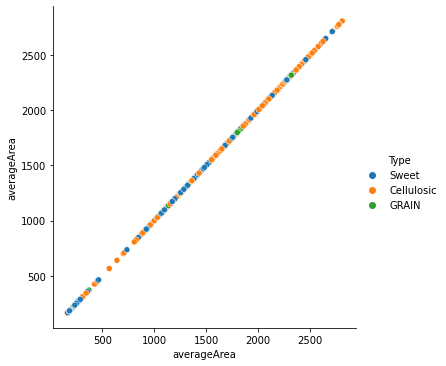

In [37]:
sns.relplot(x = 'averageArea', y = 'averageArea', hue = 'Type', data = dfMaster)

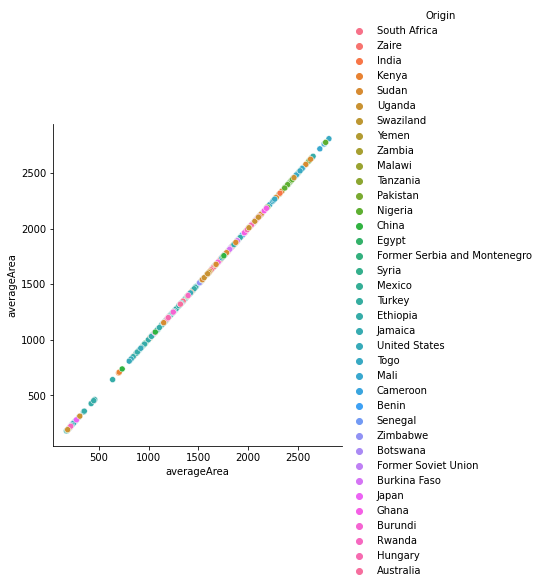

In [38]:
sns.relplot(x = 'averageArea', y = 'averageArea', hue = 'Origin', data = dfMaster)